In [ ]:
#https://practicaldatascience.co.uk/machine-learning/how-to-create-time-series-forecasts-with-neural-prophet

## Load the packages 

In [90]:
import pandas as pd
import gapandas as gp
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed 
set_random_seed(0)

## Configure GAPandas 

In [102]:
key_ga = r"C:\Users\matt\MachineLearning\GoogleAnalytics\bids-horsezip-com-3a6e955fb427.json"
view_ga = "257504837"
#215730028
start_date = "2022-02-01"
end_date = "2022-04-22"

## Fetch your Google Analytics data 

In [103]:
service = gp.get_service(key_ga)

In [104]:
payload = {
    'start_date': start_date,
    'end_date': end_date,
    'metrics': 'ga:sessions',
    'dimensions': 'ga:date'
}


In [105]:
df = gp.run_query(service, view_ga, payload)

In [108]:
df.head(50)

,date,sessions
0,2022-02-01,291
1,2022-02-02,391
2,2022-02-03,479
3,2022-02-04,272
4,2022-02-05,223
5,2022-02-06,300
6,2022-02-07,352
7,2022-02-08,450
8,2022-02-09,471
9,2022-02-10,502


## Reformat data for Neural Prophet model

In [ ]:
data = df.rename(columns={'date': 'ds', 'sessions': 'y'})[['ds', 'y']] 
data.head(10)

## Create a simple model

In [110]:
model = NeuralProphet(daily_seasonality=True)
metrics = model.fit(data, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 617


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.27E-01, min: 7.20E-01


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.27E-01, min: 5.53E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.20E-01
Epoch[617/617]: 100%|██████████| 617/617 [00:14<00:00, 42.94it/s, SmoothL1Loss=0.0118, MAE=65.9, RMSE=85.7, RegLoss=0]


## Generate predictions from the model

In [115]:
future = model.make_future_dataframe(data, periods=90)
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\matt\.conda\envs\SEOPytorch\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



In [116]:
forecast.head(30)

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
0,2022-04-23,None,385.595276,NaN,-94.293198,-132.903351,612.79187
1,2022-04-24,None,426.642883,NaN,-89.075470,-97.073509,612.79187
2,2022-04-25,None,484.255920,NaN,-83.857681,-44.678268,612.79187
3,2022-04-26,None,520.002686,NaN,-78.639954,-14.149203,612.79187
4,2022-04-27,None,570.419250,NaN,-73.422165,31.049551,612.79187
5,2022-04-28,None,856.934265,NaN,-68.204361,312.346802,612.79187
6,2022-04-29,None,495.213226,NaN,-62.986633,-54.591984,612.79187
7,2022-04-30,None,422.119659,NaN,-57.768845,-132.903351,612.79187
8,2022-05-01,None,463.167236,NaN,-52.551117,-97.073509,612.79187
9,2022-05-02,None,520.780273,NaN,-47.333313,-44.678268,612.79187


## Show the time series components

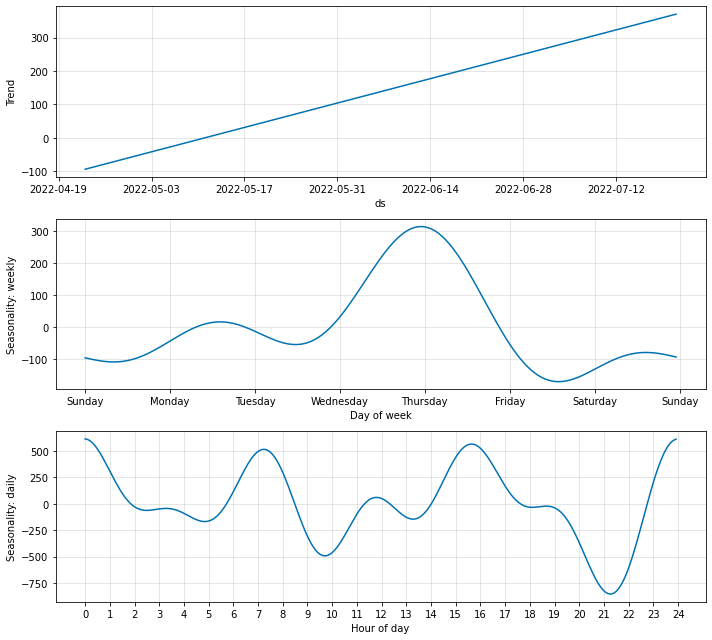

In [117]:
components = model.plot_components(forecast)

## Plot the forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\matt\.conda\envs\SEOPytorch\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.776% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.776% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\matt\.conda\envs\SEOPytorch\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.appen

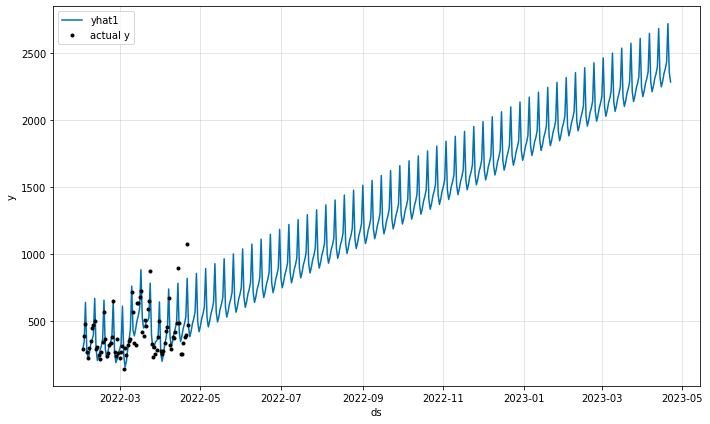

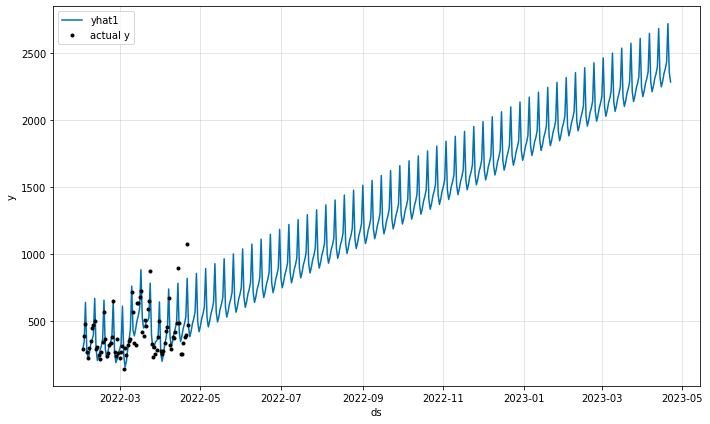

In [118]:
future = model.make_future_dataframe(data, periods=365, n_historic_predictions=True)
forecast = model.predict(future)
model.plot(forecast)